<a href="https://colab.research.google.com/github/jaynarayan94/All-Important-Topics-Codes/blob/master/Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## House prediction of Ames House dataset

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

plt.style.use('ggplot')

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 150)

In [0]:
# from google.colab import files

# upload1 = files.upload()

In [0]:
import io

df_train = pd.read_csv(io.StringIO(upload1['train.csv'].decode('utf-8')))

df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
# from google.colab import files

# upload2 = files.upload()

In [0]:
df_test = pd.read_csv(io.StringIO(upload2['test.csv'].decode('utf-8')))

df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#### Let us first perform EDA and data cleaning 

In [0]:
train_id = df_train['Id']
test_id = df_test['Id']

#Now let's drop 'Id Columns as it not needed for ML Models'

df_train.drop(['Id'],axis=1,inplace= True)
df_test.drop(['Id'],axis =1, inplace= True)

print("Train size is : {}".format(df_train.shape))

print("Test size is : {}".format(df_test.shape))

Train size is : (1460, 80)
Test size is : (1459, 79)


In [0]:
pd.concat([df_train.describe().transpose(),df_train.dtypes],axis=1)

,count,mean,std,min,25%,50%,75%,max,0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0,int64
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.00,0.0,728.00,2065.0,int64
3SsnPorch,1460.0,3.409589,29.317331,0.0,0.00,0.0,0.00,508.0,int64
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object
BedroomAbvGr,1460.0,2.866438,0.815778,0.0,2.00,3.0,3.00,8.0,int64
BldgType,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object
BsmtCond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object
BsmtExposure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0,int64
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0,int64


In [0]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

#### Let us see the distribution of outcome variable SalePrice

In [0]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

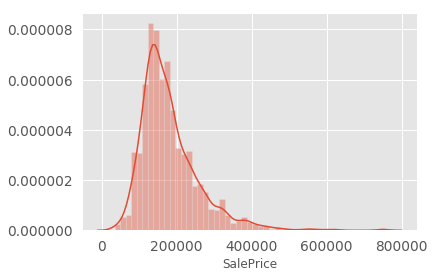

In [0]:
sns.distplot(df_train['SalePrice']);

#### We can see that we dont have a normal distribution and is skewed to the right, Normality violation will affect the estimates of the standard error (SE) and the confidence interval.

#### Let us see how are attributes related to area affect the House proce 

<Figure size 432x288 with 0 Axes>

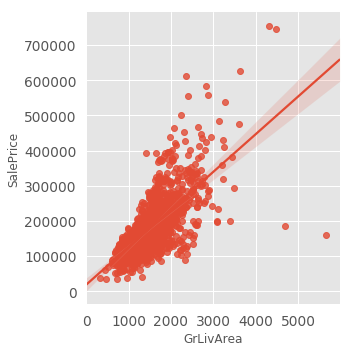

<Figure size 432x288 with 0 Axes>

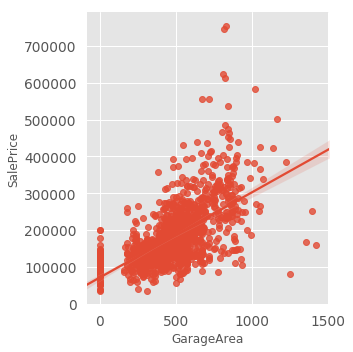

<Figure size 432x288 with 0 Axes>

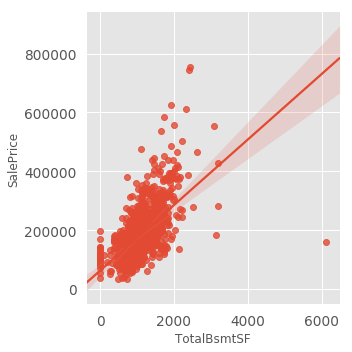

In [0]:
areas = ['GrLivArea', 'GarageArea', 'TotalBsmtSF']

for columns in areas:
  plt.figure()
  sns.lmplot(y = 'SalePrice', x = columns, data = df_train);

#### We can see there are few outliers and we will deal with them later.

#### Let us see how the SalePrice is related categorical variables like Overall quality and OverallCond of the plot

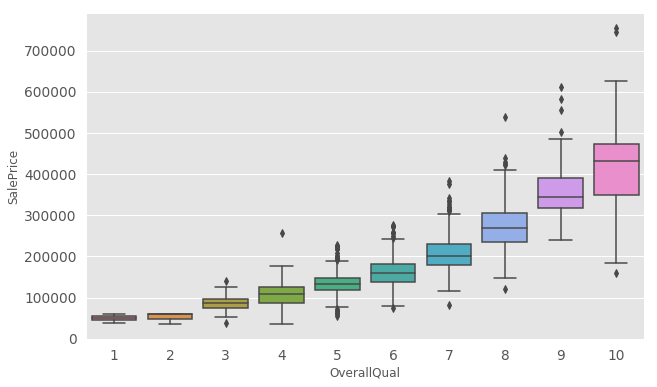

In [0]:
plt.figure(figsize=(10,6))

sns.boxplot(x = 'OverallQual', y= 'SalePrice',data = df_train)
plt.show()

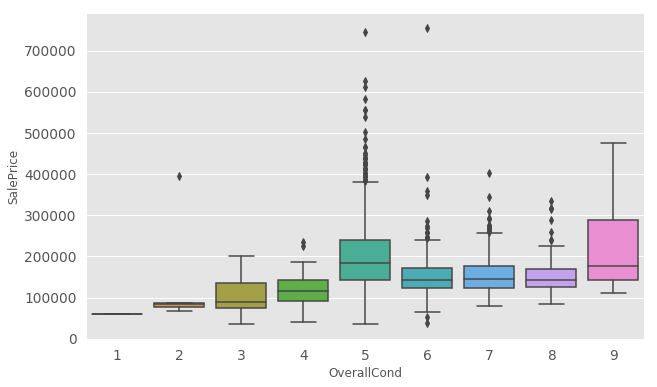

In [0]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = df_train)
plt.show();

#### We can see that with better house conditions the prices increase. 

#### Let us see how the house prices have changed over the years

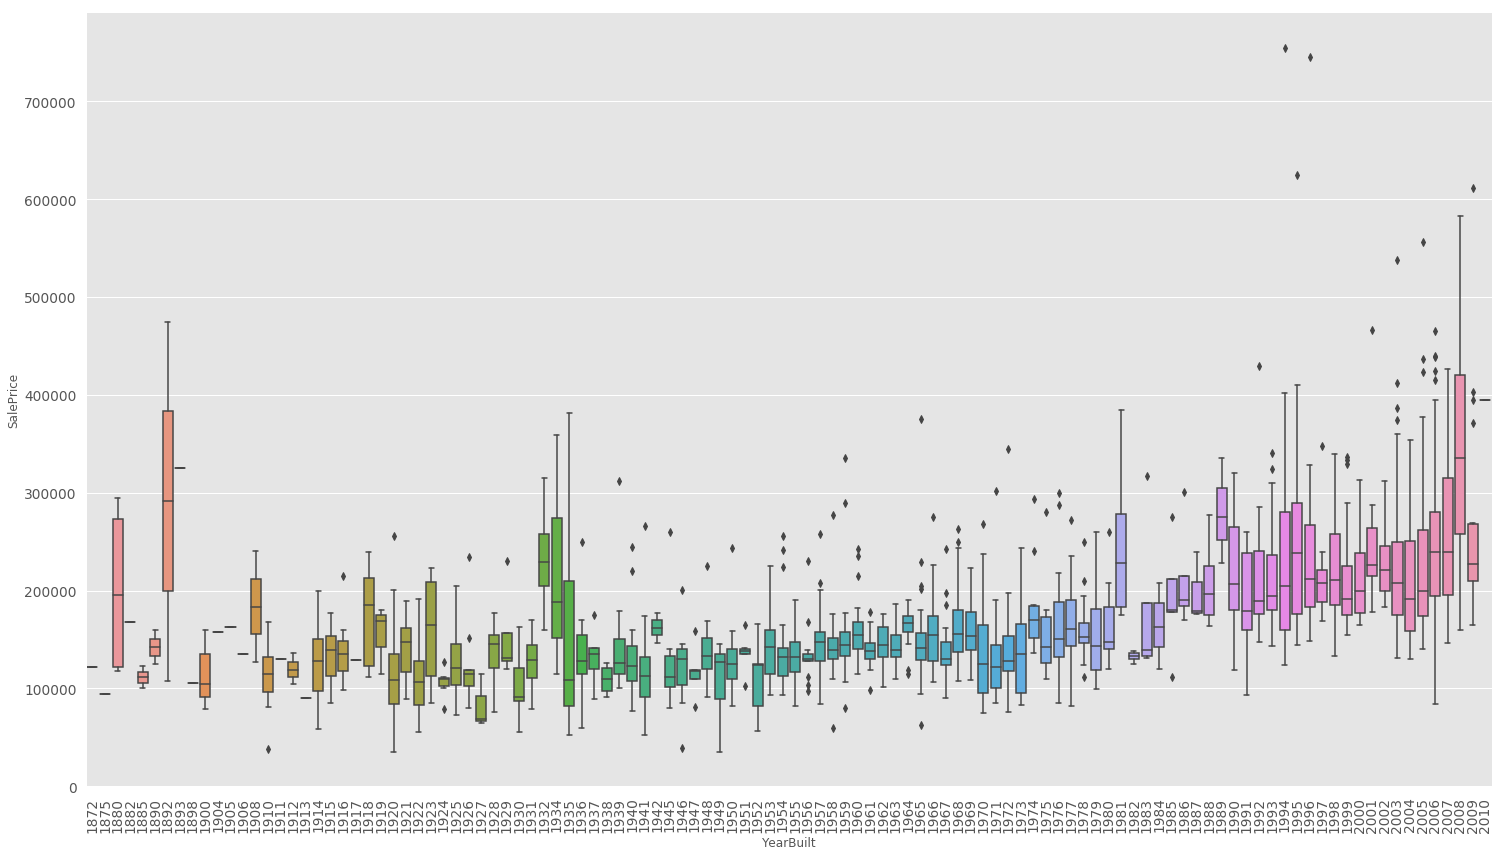

In [0]:
plt.figure(figsize=(21,12))

ax = sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = df_train)
# ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = 'right', fondsize = 12)
plt.xticks(rotation =90)
plt.tight_layout()
plt.show()

#### We can see the house prices have increased over the years and though a boxplot we can have an understanding of their distributions.

### Let us find the correlation between the variables

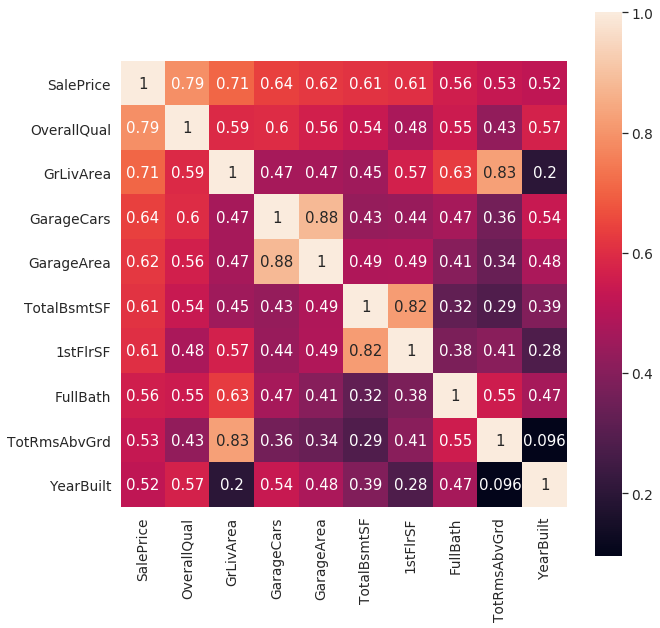

In [0]:
corr = df_train.corr()

plt.figure(figsize=(10,10))
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,yticklabels=cols.values, xticklabels=cols.values)

#### Let us now convert the outcome variable into a normal disrtibution and remove the outliers.

In [0]:
df_train.sort_values(by='GrLivArea').tail(4)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
523,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [0]:
df_train = df_train.drop(df_train.index[[523,1298]])

In [0]:
df_train.shape

(1458, 80)

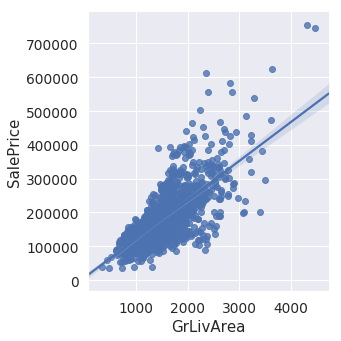

In [0]:
sns.lmplot(y = 'SalePrice', x = 'GrLivArea', data = df_train)
plt.show()

#### Here we have removed outliers with locations that had a large house size but had extremely low price these values would affect our over all prediction and hence we have removed them.

#### Let us deal with skewed distribution 

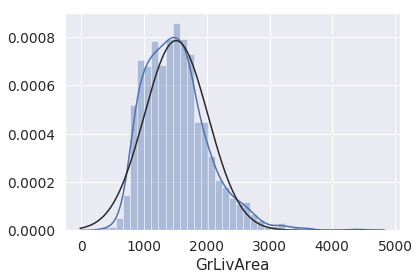

In [0]:
from scipy.stats import norm,skew
from scipy import stats

sns.distplot(df_train['GrLivArea'], fit = norm)
plt.show()

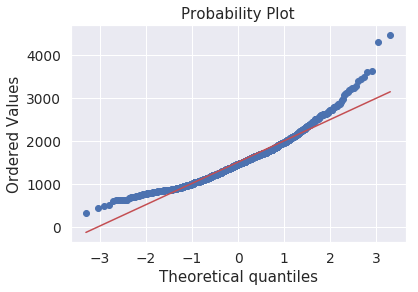

In [0]:
res = stats.probplot(df_train['GrLivArea'], plot = plt)

In [0]:
print('Shape all_data: {}'.format(df_train.shape))

Shape all_data: (1458, 80)


#### Let us combine the data and perform some feature engineering

In [0]:
y_train = df_train['SalePrice'].values

# df_train = df_train.drop(['SalePrice'],axis=1)

df_all = pd.concat([df_train,df_test]).reset_index(drop=True)

df_all.drop(['SalePrice'],axis=1,inplace=True)

print('Completer Dataset size is : {}'.format(df_all.shape))

Completer Dataset size is : (2917, 79)


## Let's deal with missing data

In [0]:
NA_values = df_all.isna().sum().sort_values(ascending=False)[:34]

NA = pd.concat([NA_values,(NA_values/len(df_all)*100)],axis=1)

NA

,0,1
PoolQC,2908,99.691464
MiscFeature,2812,96.400411
Alley,2719,93.212204
Fence,2346,80.425094
FireplaceQu,1420,48.680151
LotFrontage,486,16.660953
GarageFinish,159,5.450806
GarageQual,159,5.450806
GarageYrBlt,159,5.450806
GarageCond,159,5.450806


#### We can see that we have a lot of missing values in the features

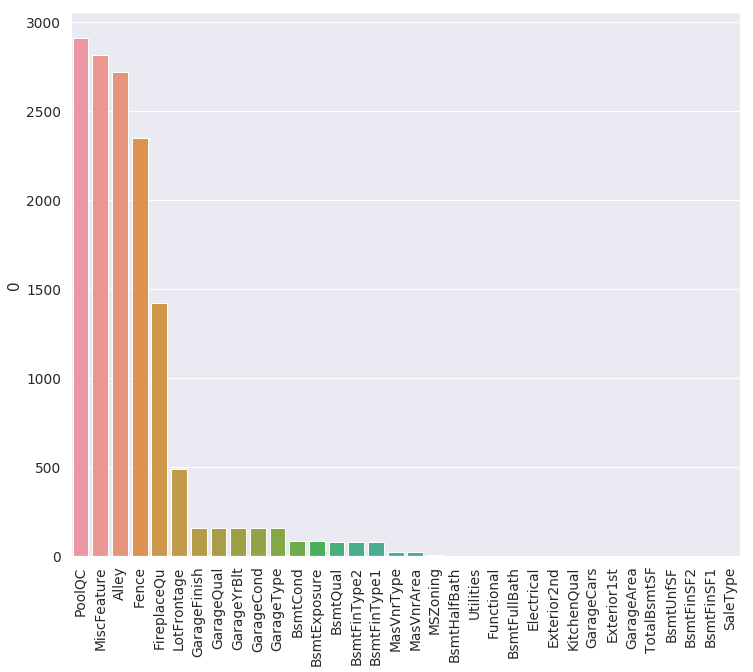

In [0]:
plt.figure(figsize=(12,10))
ax = sns.barplot(y = NA.iloc[:,0], x = NA.index)
plt.xticks(rotation = 90)
plt.show()

In [0]:
#Similarly if there is no basement then the following values would be 0 
NA_zero = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
           'MasVnrArea']

#Similarly NA indicates no feature here and we hence can fill it with 'None'
Na_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 
           'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']

for col in NA_zero:
    df_all[col] = df_all[col].fillna(0)

#Similarly None for categorical attributes
for col in Na_none:
    df_all[col] = df_all[col].fillna('None')

    
#Since area of a street is connected to the house property we can fill in missing values by the median LotFrontage of the neighborhood.
df_all["LotFrontage"] = df_all.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
    
#Here 'RL' is the most common value and we can fill this in using mode
df_all['MSZoning'] = df_all['MSZoning'].fillna(df_all['MSZoning'].mode()[0])

# For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA so it is safe to drop it
df_all = df_all.drop(['Utilities'], axis=1)

# Data description says NA means typical
df_all["Functional"] = df_all["Functional"].fillna("Typ")

#It has one NA value. and is mostly 'SBrkr', we can use mode imputation for the missing value
df_all['Electrical'] = df_all['Electrical'].fillna(df_all['Electrical'].mode()[0])

#Just like electrical it has one missing value
df_all['KitchenQual'] = df_all['KitchenQual'].fillna(df_all['KitchenQual'].mode()[0])

#Same as above
df_all['Exterior1st'] = df_all['Exterior1st'].fillna(df_all['Exterior1st'].mode()[0])
df_all['Exterior2nd'] = df_all['Exterior2nd'].fillna(df_all['Exterior2nd'].mode()[0])
df_all['SaleType'] = df_all['SaleType'].fillna(df_all['SaleType'].mode()[0])

#Na most likely means No building class
df_all['MSSubClass'] = df_all['MSSubClass'].fillna("None")

#### Let us see if there are any null values remaining

In [0]:
df_all.isnull().sum().sort_values(ascending = False).head()

YrSold         0
Foundation     0
ExterCond      0
ExterQual      0
Exterior1st    0
dtype: int64

In [0]:
print('Shape of the whole dataset: {}'.format(df_all.shape))

Shape of the whole dataset: (2917, 78)


#### Let us deal with categorical variables

#### Some attributes are actually categorical so it is required to transform them

In [0]:
#The building class
df_all['MSSubClass'] = df_all['MSSubClass'].apply(str)

#OverallCond as categorical variable
df_all['OverallCond'] = df_all['OverallCond'].astype(str)

#Year and month sold as categorical features.
df_all['YrSold'] = df_all['YrSold'].astype(str)
df_all['MoSold'] = df_all['MoSold'].astype(str)

#### Using label encoder on categorical attributes

In [0]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 
        'BsmtFinType1', 'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive', 'Street', 
        'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df_all[c].values)) 
    df_all[c] = lbl.transform(list(df_all[c].values))

# shape        
print('Shape of the whole dataset: {}'.format(df_all.shape))

Shape of the whole dataset: (2917, 78)


#### Since area related features are very important to determine house prices, we can add one more feature which is the total area of basement, first and second floor areas of each house

In [0]:
df_all['TotalSF'] = df_all['TotalBsmtSF'] + df_all['1stFlrSF'] + df_all['2ndFlrSF']

In [0]:
numeric_features = df_all.dtypes[df_all.dtypes != object].index

df_all[numeric_features].describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,EnclosedPorch,ExterCond,ExterQual,Fence,FireplaceQu,Fireplaces,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,KitchenAbvGr,KitchenQual,LandSlope,LotArea,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF
count,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.00000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000
mean,1157.692492,335.861502,2.604045,0.985602,2.860130,3.673980,2.328420,438.864930,49.599246,3.183750,5.549537,0.428865,0.061364,2.701748,560.50360,0.932808,23.114158,3.708605,2.532396,3.493315,3.072335,0.596160,1.567364,5.759685,472.247515,1.765513,4.764141,1.875557,4.689407,1870.270141,1498.251628,0.379842,1.534796,1.044566,2.348646,0.053822,10139.439150,69.436064,1.948234,4.697635,7.132328,100.931436,50.860816,6.512856,47.280082,4.564964,6.086390,1.830648,2.088790,2.993486,16.073363,0.995886,6.448063,1048.967775,93.629414,1971.287967,1984.248200,1.792938,2542.521769
std,385.264298,428.119663,25.196714,0.260180,0.822967,0.977272,1.151038,444.180542,169.232130,2.235724,1.273893,0.523943,0.245687,1.294777,439.69883,0.250398,64.263424,0.773869,0.699350,1.091669,1.145118,0.644773,0.552465,0.935605,214.762268,0.762102,0.803313,1.201826,0.950526,449.826161,496.908626,0.502782,1.742682,0.214532,0.832392,0.248831,7807.036512,21.208242,1.409743,46.412570,3.699114,178.032499,567.595198,2.983653,67.118965,1.113414,1.406704,0.537465,34.561371,0.126789,56.202054,0.064018,1.564281,429.472008,126.532643,30.286991,20.892257,1.315328,781.071852
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1300.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,0.000000,334.000000
25%,876.000000,0.000000,0.000000,1.000000,2.000000,4.000000,2.000000,0.000000,0.000000,2.000000,6.000000,0.000000,0.000000,2.000000,220.00000,1.000000,0.000000,4.000000,2.000000,4.000000,2.000000,0.000000,1.000000,6.000000,320.000000,1.000000,5.000000,1.000000,5.000000,1957.000000,1126.000000,0.000000,0.000000,1.000000,2.000000,0.000000,7476.000000,60.000000,0.000000,0.000000,5.000000,0.000000,0.000000,5.000000,0.000000,4.000000,5.000000,2.000000,0.000000,3.000000,0.000000,1.000000,5.000000,793.000000,0.000000,1953.000000,1965.000000,1.000000,2000.000000
50%,1082.000000,0.000000,0.000000,1.000000,3.000000,4.000000,3.000000,368.000000,0.000000,2.000000,6.000000,0.000000,0.000000,2.000000,467.00000,1.000000,0.000000,4.000000,3.000000,4.000000,3.000000,1.000000,2.000000,6.000000,480.000000,2.000000,5.000000,2.000000,5.000000,1977.000000,1444.000000,0.000000,0.000000,1.000000,3.000000,0.000000,9452.000000,70.000000,3.000000,0.000000,5.000000,0.000000,0.

#### Let us see if there is skewness in the data

In [0]:
skewed_features = df_all[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame({'Skew' : skewed_features})
skewness.head(10)

,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [0]:
skewness = skewness[abs(skewness.Skew)>0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #df_all[feat] += 1
    df_all[feat] = boxcox1p(df_all[feat], lam)

There are 36 skewed numerical features to Box Cox transform


In [0]:
df_all = pd.get_dummies(df_all)
print(df_all.shape) 

(2917, 220)


### Lets use machine learning

In [0]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
train = df_all[:ntrain]
test = df_all[ntrain:]

In [0]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [0]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data.<br> That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

In [0]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=12))

Lasso uses L1 regularization technique <br>
It is generally used when we have more number of features, because it automatically does feature selection.

In [0]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=13))

Elastic net is basically a combination of both L1 and L2 regularization. So if you know elastic net, you can implement both Ridge and Lasso by tuning the parameters. So it uses both L1 and L2 penality term <br>
<br>
We have a bunch of correlated independent variables in a dataset, then elastic net will simply form a group consisting of these correlated variables. Now if any one of the variable of this group is a strong predictor (meaning having a strong relationship with dependent variable), then we will include the entire group in the model building, because omitting other variables (like what we did in lasso) might result in losing some information in terms of interpretation ability, leading to a poor model performance.

In [0]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

Kernel ridge regression is essentially the same as usual ridge regression, but uses the kernel trick to go non-linear.

In [0]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

Boosting is an ensemble technique where new models are added to correct the errors made by existing models. Models are added sequentially until no further improvements can be made.
<br>
XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.



In [0]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2500,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [0]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=1000,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

In [0]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 28809.7789 (2406.4882)



In [0]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 28682.1082 (2380.7886)



In [0]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 32533.9627 (2620.5411)



In [0]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 22954.2876 (2929.3180)



In [0]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 21517.1751 (2150.3039)



### In this method, we take an average of predictions from all the models and use it to make the final prediction.

In [0]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [0]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 24663.6681 (2677.1165)



#### Final Training and Prediction

In [0]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [0]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

2923.1550912466932


In [0]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

10899.975097487202
